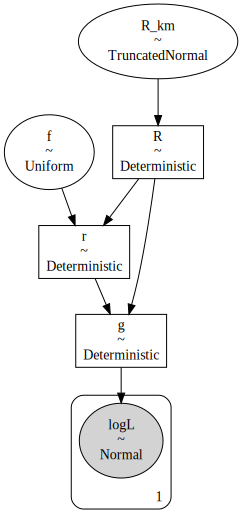

In [1]:
import numpy as np
import pymc as pm
import corner
import arviz as az
import matplotlib.pyplot as plt

# observed gravity
g_obs = np.array([1.625]) # m/s^2
# gravity uncertainty: 10% in this case.
g_sigma = np.array([1.625*0.1]) # m/s^2

with pm.Model() as model:
    f = pm.Uniform('f', 0, 1) # fraction of core
    
    R_km = pm.TruncatedNormal('R_km', mu=1738.1, sigma=2, lower=0., upper=np.inf) # radius of the moon in km
    R = pm.Deterministic('R', R_km*1e3) # convert R to m.
    r = pm.Deterministic('r', R * f) # core radius: R*f.
    
    G = 6.67e-11
    # core density
    sigma_c = 7000 # core density in kg/m^3
    sigma_s = 2500 # shell density in kg/m^3
    g = pm.Deterministic('g', G*(sigma_c * 4/3*np.pi*r**3 + sigma_s * 4/3*np.pi*(R**3 - r**3)) / R**2) # gravity in m/s^2
    
    # likelihood
    pm.Normal('logL', g, observed=g_obs, sigma=g_sigma)

pm.model_to_graphviz(model)

In [2]:
# sample the model
with model:
    idata = pm.sample(chains=10)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 4 jobs)
NUTS: [f, R_km]


/Users/weilingfeng/Software/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/weilingfeng/Software/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/weilingfeng/Software/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/weilingfeng/Software/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/weilingfeng/Software/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a

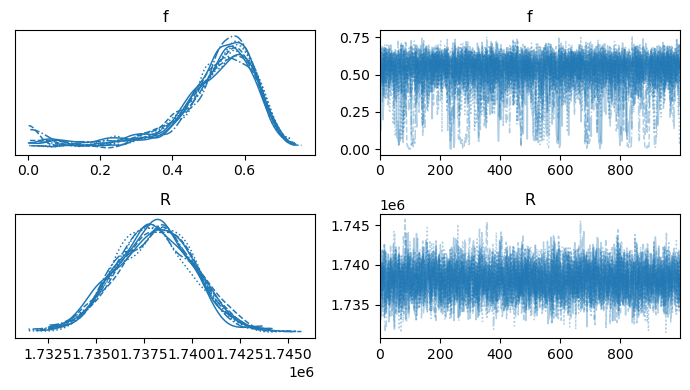

In [3]:
# plot the trace of f and rs.
az.plot_trace(idata, var_names=['f','R'], figsize=(7,4))
plt.tight_layout()
plt.savefig('trace.jpg')

In [4]:
# extract the chain
f_chain = idata.posterior.f.values.ravel()
R_chain = idata.posterior.R.values.ravel()

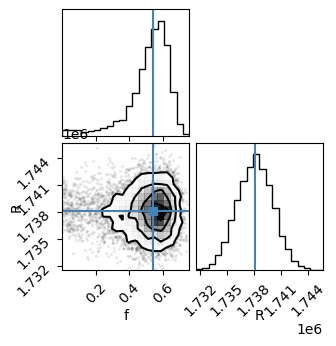

In [5]:
# corner plot
fig = corner.corner(idata, var_names=['f','R'], labels=['f', 'R'], truths=[np.median(f_chain), np.median(R_chain)])
fig.set_size_inches(3.5, 3.5)